In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rain', 'rain', 'rain', 'overcast',
                'sunny', 'sunny', 'rain', 'sunny', 'overcast', 'overcast', 'rain',
                'sunny', 'overcast', 'rain', 'sunny', 'sunny', 'rain', 'overcast',
                'rain', 'sunny', 'overcast', 'sunny', 'overcast', 'rain', 'overcast'],
    'Temp.': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0,
              72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0,
              88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humid.': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0,
               90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0,
               65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True,
             True, False, True, True, False, False, True, False, True, True, False,
             True, False, False, True, False, False],
    'Num_Players': [52, 39, 43, 37, 28, 19, 43, 47, 56, 33, 49, 23, 42, 13, 33, 29,
                    25, 51, 41, 14, 34, 29, 49, 36, 57, 21, 23, 41]
}

df = pd.DataFrame(dataset_dict)
df.head()

,Outlook,Temp.,Humid.,Wind,Num_Players
0,sunny,85.0,85.0,False,52
1,sunny,80.0,90.0,True,39
2,overcast,83.0,78.0,False,43
3,rain,70.0,96.0,False,37
4,rain,68.0,80.0,False,28


In [3]:
# One-hot encode 'Outlook' and convert 'Wind' to integer
df = pd.get_dummies(df, columns=['Outlook'], prefix='', prefix_sep='')
df['Wind'] = df['Wind'].astype(int)

In [4]:
# Separate features and target
X = df.drop('Num_Players', axis=1)
y = df['Num_Players']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.5, shuffle=False
)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (14, 6)
Test shape: (14, 6)


In [6]:
rf = RandomForestRegressor(
    n_estimators=100,
    max_features='sqrt',
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', random_state=42)

In [7]:
y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nRoot Mean Squared Error: {rmse:.2f}")


Root Mean Squared Error: 6.49


/tmp/ipykernel_8241/2869696308.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances.values, y=feat_importances.index, palette="coolwarm")


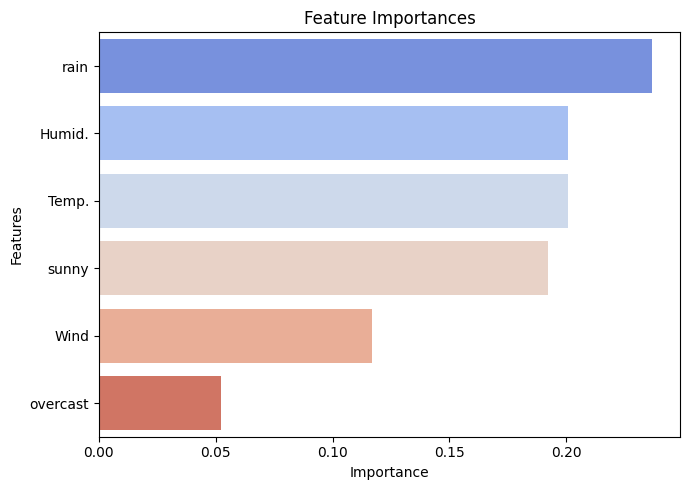

In [8]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(7, 5))
sns.barplot(x=feat_importances.values, y=feat_importances.index, palette="coolwarm")
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

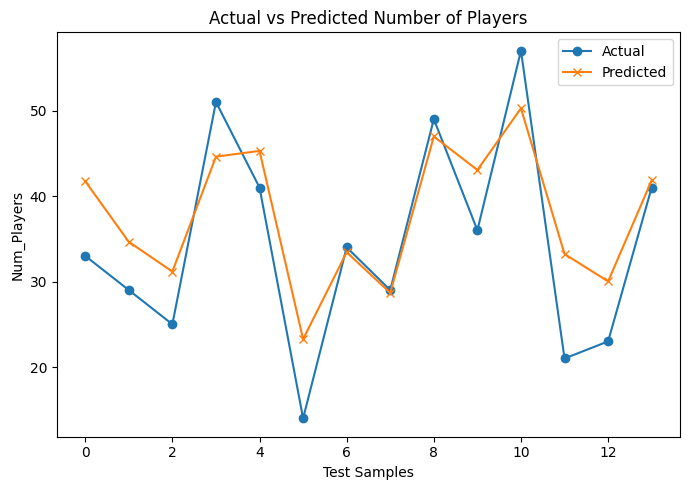

In [9]:
plt.figure(figsize=(7, 5))
plt.plot(range(len(y_test)), y_test, label="Actual", marker='o')
plt.plot(range(len(y_pred)), y_pred, label="Predicted", marker='x')
plt.title("Actual vs Predicted Number of Players")
plt.xlabel("Test Samples")
plt.ylabel("Num_Players")
plt.legend()
plt.tight_layout()
plt.show()
